In [1]:
"""
In this section the team imported the following libraries:
matplotlib: for creating the charts, graphs, etc. 
Pandas: to make an analysis of the information in a tubular form.
Scipy.stats: the team imported this for the different distributions and regression analysis.
Numpy: for working with arrays and matrices.
Linregress: To make linear regressions.
math: For performing mathematical operations. 
time: Is a library for working with time. 
"""

'\nIn this section the team imported the following libraries:\nmatplotlib: for creating the charts, graphs, etc. \nPandas: to make an analysis of the information in a tubular form.\nScipy.stats: the team imported this for the different distributions and regression analysis.\nNumpy: for working with arrays and matrices.\nLinregress: To make linear regressions.\nmath: For performing mathematical operations. \ntime: Is a library for working with time. \n'

In [2]:
#Importin libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import math
import time

In [3]:
""""
First the team defined "newdb.csv", which is the CSV file, as dbpath. Then the code reads the CSV file. 

After that, we created a Pandas dataframe to create a new Dataframe that has the same data as db. 

Finally, the information was printed. 
 
""""

SyntaxError: EOL while scanning string literal (3890739325.py, line 8)

In [4]:
#Reading new database.
dbpath="newdb.csv"
db= pd.read_csv(dbpath)
newdf=pd.DataFrame(db)
newdf.head()

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,country
0,0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,FRANCE
1,1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,FRANCE
2,2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,FRANCE
3,3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,FRANCE
4,4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,FRANCE


In [5]:
""""
This code takes a CSV file newdb.csv and reads it into a Pandas DataFrame called newdf.

Afterwards, It  a new DataFrame called new_categories was created by sorting newdf in descending order by the number of views.

Then, new_categories was modified to include three new columns: "revenue" where the number of views was multiplied by 0.004, 

"views_ln" (the natural logarithm of the number of views), and "likes_ln" (the natural logarithm of the number of likes).

""""

SyntaxError: EOL while scanning string literal (1009472066.py, line 10)

In [6]:
new_categories = newdf.sort_values("views", ascending=False)
new_categories.head()
#calculatin the revenue per video 
new_categories['revenue'] = new_categories['views']*.004
new_categories ['views_ln'] = np.log(new_categories['views'])
new_categories ['likes_ln'] = np.log(new_categories['likes'])
last_date = new_categories['publish_time'].max()

new_categories.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,country,revenue,views_ln,likes_ln
69136,28412,18.07.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,GREAT BRITAIN,1698155.648,19.866514,14.851812
68936,28212,18.06.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699,2768654,145643,97218,GREAT BRITAIN,1654346.796,19.840378,14.833872
68732,28008,18.05.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804,2719005,142006,95713,GREAT BRITAIN,1610603.216,19.813580,14.815777
68535,27811,18.04.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878,2670723,138334,93834,GREAT BRITAIN,1568147.512,19.786866,14.797860
68339,27615,18.03.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497,2618320,134625,92387,GREAT BRITAIN,1529605.988,19.761982,14.778043


In [7]:
"""
To create this pie chart, which is an analysis of the views per France, Germany and Breat Britan, the libraries Matplotlib, 
Pandas, and NumPy were used. It reads the file "data.csv" into a Pandas DataFrame called data, and then creates a new 
DataFrame called grouped_data by grouping the infromation from "category" column and then it sums the data from "views" 
column for each group.

"""

'\nTo create this pie chart, which is an analysis of the views per France, Germany and Breat Britan, the libraries Matplotlib, Pandas, and NumPy were used. It reads the file "data.csv" into a Pandas DataFrame called data, and then creates a new DataFrame called \ngrouped_data by grouping the infromation from "category" column and then it sums the data from "views" column for each group.\n\n'

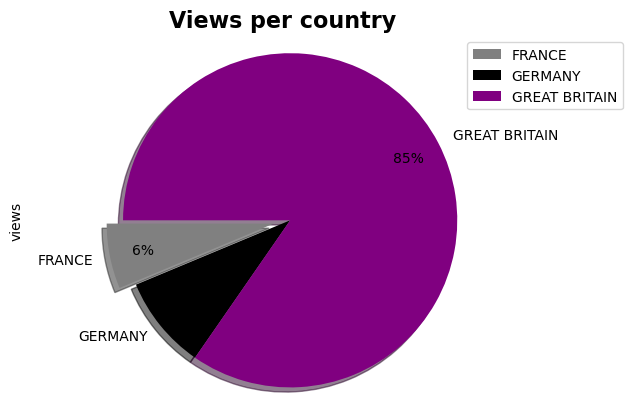

In [8]:
views_per_country = new_categories.groupby(["country"]).sum()["views"]
views_per_country_df = pd.DataFrame(views_per_country)
colors = ['gray', 'black', 'purple'] # define custom colors for the slices
explode = [0.1, 0, 0] # explode the first slice
views_per_country_df.plot(kind='pie', y='views', autopct='%1.0f%%', startangle=180, colors=colors, explode=explode, shadow=True, pctdistance=0.8, labeldistance=1.1)
plt.title('Views per country', fontsize=16, fontweight='bold')
plt.legend(labels=views_per_country_df.index, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

In [9]:
"""
The team used the libraries of Matplotlib and Pandas for creating again a pie chart of the Total revenue per country. 
Firt, we grouped the data from "new_categories" by country and sum up the "revenue". After that, a new DataFrame called 
"views_per_country" was created to store the information. 
Finally, the team gave format to plot the chart as disired.
"""

'\nThe team used the libraries of Matplotlib and Pandas for creating again a pie chart of the Total revenue per country. \nFirt, we grouped the data from "new_categories" by country and sum up the "revenue". After that, a new DataFrame called "views_per_country" was created to store the information. \nFinally, the team gave format to plot the chart as disired.\n'

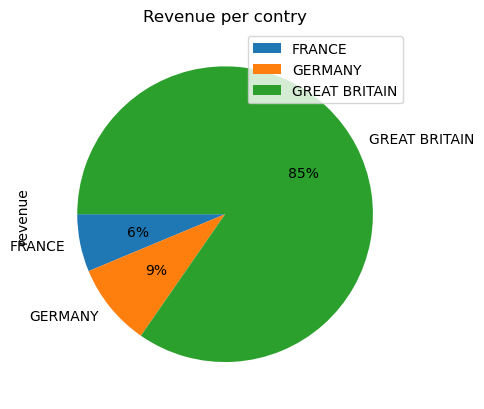

In [10]:
# Total revenue  per country
views_per_country = new_categories.groupby(["country"]).sum()["revenue"]
views_per_country_df = pd.DataFrame(views_per_country)
# views_per_country_df.plot(kind="bar")
# plt.xlabel('Revenue')
# plt.ylabel('Views')
# plt.title('Revenue per contry')
# plt.show()

views_per_country_df.plot(kind='pie', y='revenue', autopct='%1.0f%%',startangle=180)
plt.title('Revenue per contry')
plt.show()

In [11]:
"""
For building this scatter plot about the relationship between Likes and Views, the libraries SciPy, Matplotlib and Pandas 
were used.
First, the team selected how the informations was going to be presented in the x and y axis. Then, we used the linregress 
function to calculate the linear regression and create the regression line using the slope and intercept.

"""

'\nFor building this scatter plot about the relationship between Likes and Views, the libraries SciPy, Matplotlib and Pandas were used.\nFirst, the team selected how the informations was going to be presented in the x and y axis. Then, we used the linregress function to calculate the linear regression and create the regression line using the slope and intercept.\n\n'

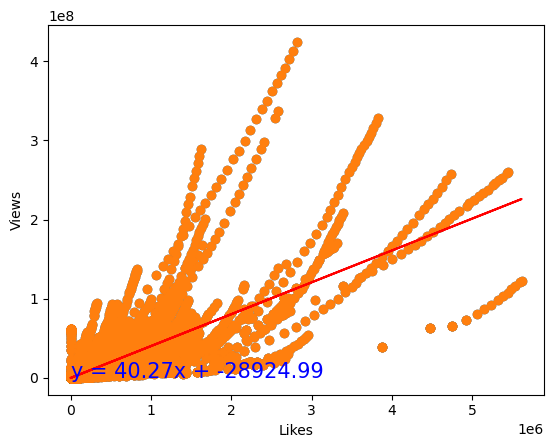

In [12]:
new_categories.head()
x_values = new_categories["likes"]
x_values 
y_values = new_categories["views"]
plt.scatter(x_values,y_values)
plt.xlabel('likes')
plt.ylabel('views')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [14]:
"""
In this scatter plot, the same process mentioned before was followed, but the difference is that the team included the
R-squared for the linear regression.
A string variable called "text" is then created and contains the R-squared value, rounded to two decimal places. 
Last but not least, it uses the annotate function to add this text as an annotation to the scatter plot.

"""

'\nIn this scatter plot, the same process mentioned before was followed, but the difference is that the team included th R squared for the linear regression.\nA string variable called "text" is then created and contains the R-squared value, rounded to two decimal places. Last but not least, it uses the annotate \nfunction to add this text as an annotation to the scatter plot.\n\n'

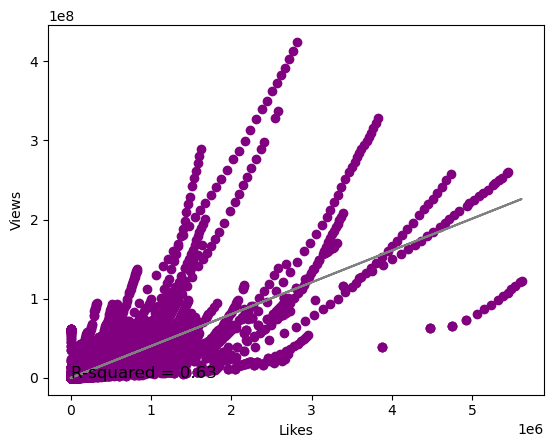

In [15]:
x_values = new_categories["likes"]
y_values = new_categories["views"]

# Generate scatter plot with purple points
plt.scatter(x_values,y_values, color='purple')
plt.xlabel('Likes')
plt.ylabel('Views')

# Add regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, c="gray")

# Add R-squared value to plot
r_squared = rvalue ** 2
text = "R-squared = " + str(round(r_squared,2))
plt.annotate(text, (5.8,0.6), fontsize=12, color="black")

plt.show()

In [16]:
"""
For creating a bar chart to analyze the Revenue per category for Germany, the team filtered the dataframe to get data from 
the three countries and then calculated the total views per video category for each of these countries.
The resulting dataframes are then sorted in descending order based on the total views. 
Finally, the total views per category for Germany were plotted to a bar chart with the x-axis representing the video 
categories and the y-axis representing the total views for each category. 

"""

'\nFor creating a bar chart to analyze the Revenue per category for Germany, the team filtered the dataframe to get data from the three countries and then calculated the total views per video category for each of these countries.\nThe resulting dataframes are then sorted in descending order based on the total views. \nFinally, the total views per category for Germany were plotted to a bar chart with the x-axis representing the video categories and the y-axis representing the total views for each category. \n\n'

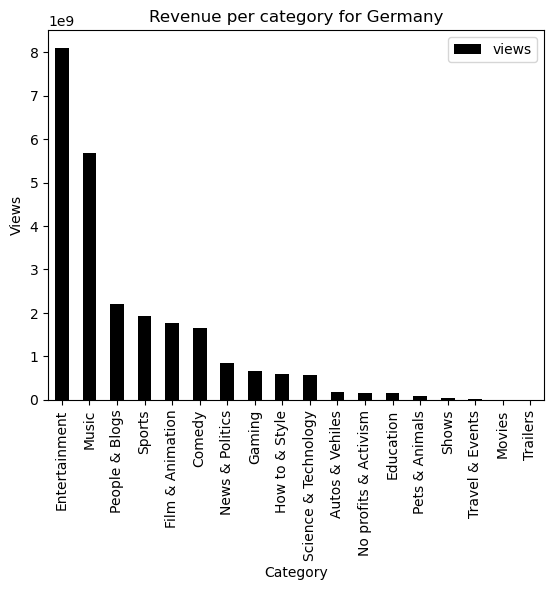

In [17]:
GR_new_categories = new_categories[(new_categories["country"] == "GREAT BRITAIN")]
FR_new_categories = new_categories[(new_categories["country"] == "FRANCE")]
DE_new_categories = new_categories[(new_categories["country"] == "GERMANY")]

views_per_category_GR = pd.DataFrame(GR_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_GR = views_per_category_GR.sort_values("views", ascending=False)
# views_per_category_GR["views"] = views_per_category_GR["views"].map("{:,}".format)

views_per_category_FR = pd.DataFrame(FR_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_FR = views_per_category_FR.sort_values("views", ascending=False)
# views_per_category_FR["views"] = views_per_category_FR["views"].map("{:,}".format)

views_per_category_DE = pd.DataFrame(DE_new_categories.groupby(["category_id"]).sum()["views"])
views_per_category_DE = views_per_category_DE.sort_values("views", ascending=False)
# views_per_category_DE["views"] = views_per_category_DE["views"].map("{:,}".format)


views_per_category_DE.plot(kind="bar", color ="black")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Revenue per category for Germany')
plt.show()

In [18]:
"""
The same process was used for obtaining the Revenue per category for Great Britain. 
"""

'\nThe same process was used for obtaining the Revenue per category for Great Britain. \n'

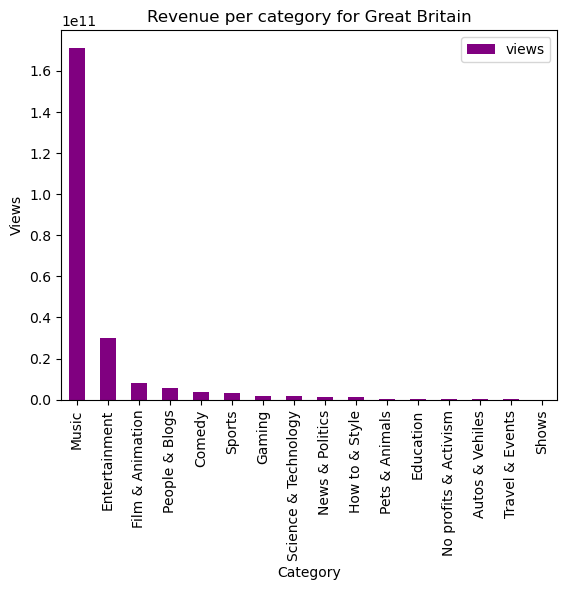

In [19]:
views_per_category_GR.plot(kind="bar", color ="purple")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Revenue per category for Great Britain')
plt.show()

In [20]:
"""
The same process was used for obtaining the Revenue per category for Great France. 
"""

'\nThe same process was used for obtaining the Revenue per category for Great France. \n'

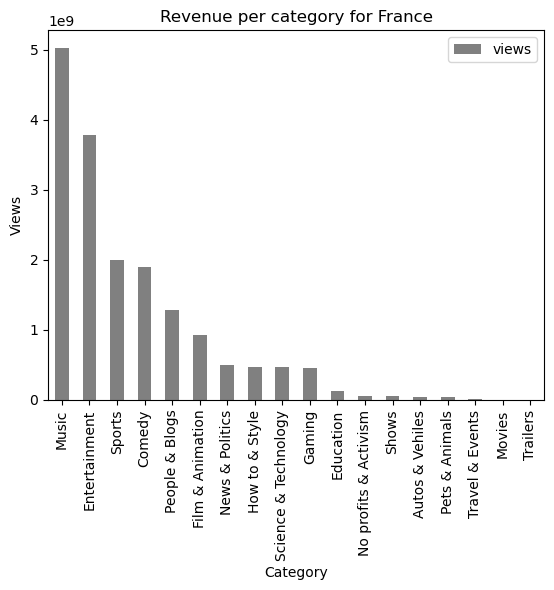

In [21]:
views_per_category_FR.plot(kind="bar", color ="gray")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Revenue per category for France')
plt.show()


In [22]:
"""
For this part, the team decided to make a correlation matrix between the Views, Likes, Dislikes and Comment_count. 
The color of each square corresponds to the strength and direction of the correlation between the two variables. 
The darker the color, the stronger the correlation. The plot also includes a color bar to the right of the heatmap, 
which shows the range of correlation values. Finally, the x- and y-axis labels are set to the column names, and the plot is 
displayed using the show() function.

"""

'\nFor this part, the team decided to make a correlation matrix between the Views, Likes, Dislikes and Comment_count. \nThe color of each square corresponds to the strength and direction of the correlation between the two variables. \nThe darker the color, the stronger the correlation. The plot also includes a color bar to the right of the heatmap, \nwhich shows the range of correlation values. Finally, the x- and y-axis labels are set to the column names, and the plot is displayed using the show() function.\n\n'

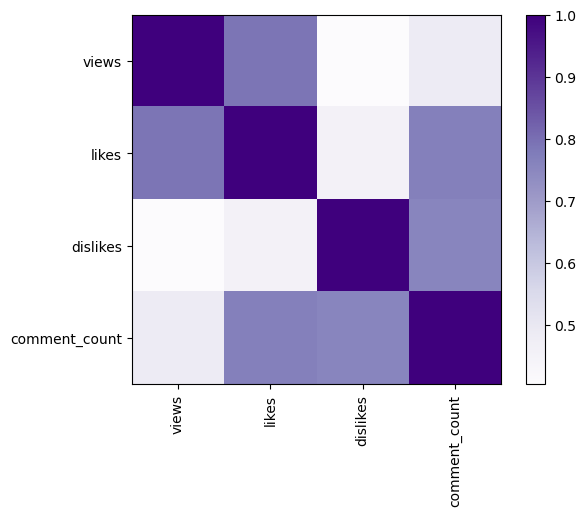

In [23]:
correlation = new_categories[['views', 'likes', 'dislikes','comment_count']].corr()

# Visualize the correlation matrix as a heatmap
plt.imshow(correlation, cmap='Purples', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

In [24]:
"""
The total views, likes, dislikes, and comments for each category are determined using this code, which groups
YouTube videos by category ID. The percentage of likes, dislikes, and comments compared to all views for each category 
was added to a new DataFrame.
"""


'\nThe total views, likes, dislikes, and comments for each category are determined using this code, which groups YouTube videos by category ID. \nThe percentage of likes, dislikes, and comments compared to all views for each category was added to a new DataFrame.\n'

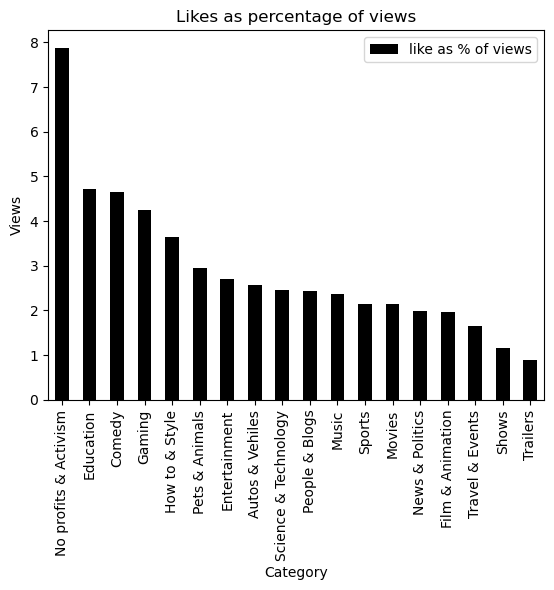

In [25]:
views_per_category_v2 = new_categories.groupby(["category_id"]).sum()
views_per_category_v2_df = pd.DataFrame(views_per_category_v2)
views_per_category_v2_df = views_per_category_v2_df[["views","likes","dislikes","comment_count"]]
views_per_category_v2_df['like as % of views'] = (views_per_category_v2_df['likes']/views_per_category_v2_df['views'])*100
views_per_category_v2_df['dislike as % of views'] = (views_per_category_v2_df['dislikes']/views_per_category_v2_df['views'])*100
views_per_category_v2_df['commens as % of views'] = (views_per_category_v2_df['comment_count']/views_per_category_v2_df['views'])*100
likes_per_category_v2_df = views_per_category_v2_df[["like as % of views"]]
likes_per_category_v2_df = likes_per_category_v2_df.sort_values("like as % of views", ascending=False)


likes_per_category_v2_df.plot(kind="bar", color ="black")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Likes as percentage of views')
plt.show()

In [26]:
"""
For representing the percentage of dislikes for each video category, the team created a new dataframe called 
"dislikes_per_category_v2_df" that only contains the column "dislike as % of views" from another dataframe called
"views_per_category_v2_df". Then for creating the bar plot the team used "dislikes_per_category_v2_df" dataframe. 
Each bar represets the different video category and the height of the bar representing the percentage of dislikes 
for that category.
"""


'\nFor representing the percentage of dislikes for each video category, the team created a new dataframe called "dislikes_per_category_v2_df" \nthat only contains the column "dislike as % of views" from another dataframe called "views_per_category_v2_df". Then for creating the \nbar plot the team used "dislikes_per_category_v2_df" dataframe. Each bar represets the different video category and the height of the bar \nrepresenting the percentage of dislikes for that category.\n\n'

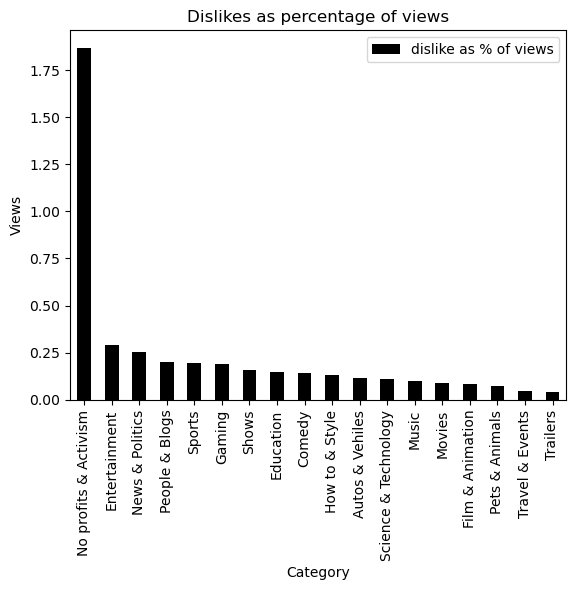

In [27]:
dislikes_per_category_v2_df = views_per_category_v2_df[["dislike as % of views"]]
dislikes_per_category_v2_df = dislikes_per_category_v2_df.sort_values("dislike as % of views", ascending=False)
dislikes_per_category_v2_df.plot(kind="bar", color ="black")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Dislikes as percentage of views')
plt.show()

In [28]:
"""
The same process was used as the code before, but this time for the "commens as % of views". Then the bar chart was ploted. 
"""

'\nThe same process was used as the code before, but this time for the "commens as % of views". Then the bar chart was ploted. \n'

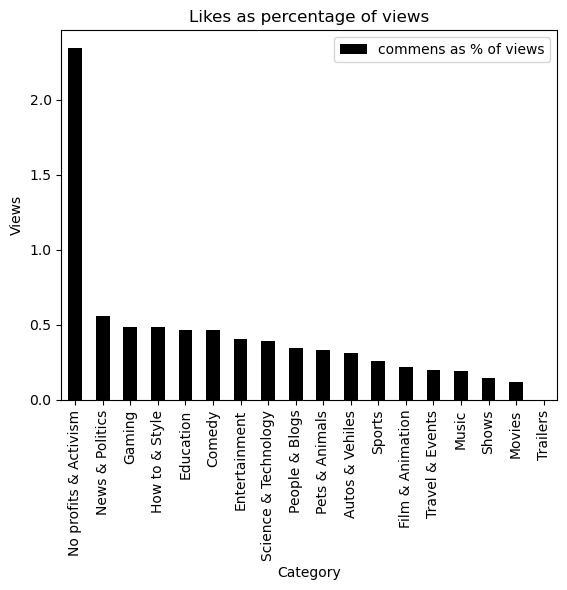

In [29]:
comments_per_category_v2_df = views_per_category_v2_df[["commens as % of views"]]
comments_per_category_v2_df = comments_per_category_v2_df.sort_values("commens as % of views", ascending=False)
comments_per_category_v2_df.plot(kind="bar", color ="black")
plt.xlabel('Category')
plt.ylabel('Views')
plt.title('Likes as percentage of views')
plt.show()